In [170]:
import pandas as pd

data = pd.read_csv('../one_hot_encoded_data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [171]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [172]:
# convert one-hot encoded features to float type

for i in list(data.columns):
    if data[i].dtype == 'int64':
        data[i] = data[i].astype('float')

In [173]:
data_copy = data
data_target = data['loan_status']
data.drop('loan_status',inplace=True, axis=1)
data_input = data

In [174]:
X = data_input
y = data_target

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X, y = X_scaled, data_target

In [12]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [10]:
from sklearn.decomposition import PCA

n_components = []
for i in range(20):
    if i*3 < 267:
        n = 2 + i*3
        n_components.append(n)
print(n_components)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59]


In [19]:
results = []
#for i in range(16,18):
for i in n_components:
    pca = PCA(n_components=i)
    x_pca = pca.fit_transform(X)
    clf = LogisticRegression()
    cv = cross_validate(clf, x_pca, data_target, cv=3)
    results.append(cv['test_score'].mean())

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, whic

In [20]:
results.index(max(results))

19

In [27]:
n_components[19]

59

In [22]:
results[19]

0.9811691766710752

In [23]:
max(results)

0.9811691766710752

In [26]:
for i in results:
    index = results.index(i)
    print(i, index)

0.917383029293497 0
0.9733684850858455 1
0.974000336645172 2
0.9743045637823905 3
0.9744683783666535 4
0.974585388888301 5
0.9747023986797304 6
0.974655594617115 7
0.9747414025520555 8
0.9748272082963414 9
0.9750456285939465 10
0.9753498520800742 11
0.9703028872599329 12
0.9750222568666923 13
0.975763333726848 14
0.9720659095341349 15
0.9767540166762987 16
0.9757477519668298 17
0.9803657442923392 18
0.9811691766710752 19


In [ ]:
#hhhhhhhhhhhhhhhhhh 第二波！！！！！！！！！！！！！！！！！！！！！！

In [29]:
n_components = []
for i in range(20, 30):
    if i*3 < 267:
        n = 2 + i*3
        n_components.append(n)
print(n_components)

[62, 65, 68, 71, 74, 77, 80, 83, 86, 89]


In [30]:
results = []
#for i in range(16,18):
for i in n_components:
    pca = PCA(n_components=i)
    x_pca = pca.fit_transform(X)
    clf = LogisticRegression()
    cv = cross_validate(clf, x_pca, data_target, cv=3)
    results.append(cv['test_score'].mean())

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, whic

In [31]:
max(results)

0.9799054326602059

In [32]:
results

[0.9759740107911785,
 0.9761534407254945,
 0.9772533102742124,
 0.9775653405225939,
 0.9760520459190091,
 0.9767619033974401,
 0.9786261744344973,
 0.9799054326602059,
 0.974764842189598,
 0.9772532894629951]

In [8]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
def svm():
    scoreList = []
    kf = KFold(n_splits=3, random_state=25, shuffle=False)
    
    X, y = data_input, data_target
    clf = LogisticRegression()
    clf.fit(X, y).predict(X) 
    score = cross_val_score(clf,X,y, cv = kf)
    scoreList.append(score)
    print(scoreList)

In [19]:
svm()

[array([0.9662782 , 0.93119749, 0.96772835])]


In [ ]:
summary(y)

In [181]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

pca = PCA(n_components=59)
x_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test_matrix = train_test_split(x_pca, y, test_size=0.2,random_state = 55)
clf = LogisticRegression()
y_test_matrix = clf.fit(X_train, y_train).predict(X_test)

In [182]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.decomposition import PCA

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig('confusion matrix LDA.png')
    return ax

Confusion matrix, without normalization
[[   36     0     0     0     0     0]
 [    0 23827     0     0     0     0]
 [    0     0  1538     0     0     0]
 [    0     0     0    14     0     0]
 [    0     0     0     0     3     0]
 [    0     0     0     0     0   221]]


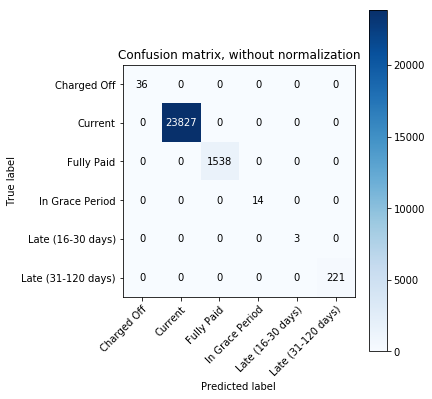

In [183]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

# data_target和pred1 都是pandas格式，array应该也可以
plot_confusion_matrix(y_test_matrix, y_test_matrix,title='Confusion matrix, without normalization')

plt.show()

In [ ]:
########### ROC Curve 从这里开始！！！！

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 55)

In [185]:
y_test=np.array(y_test)

In [186]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
y_predict = clf.fit(X_train, y_train).predict(X_test)
y_predict_probability = clf.fit(X_train, y_train).predict_proba(X_test)

In [187]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


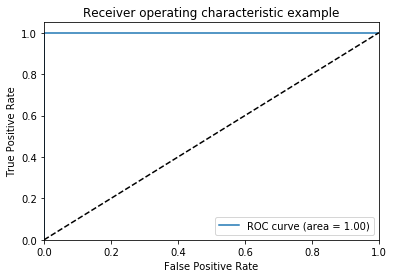

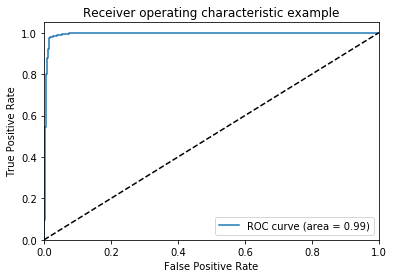

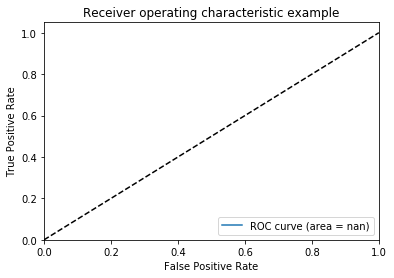

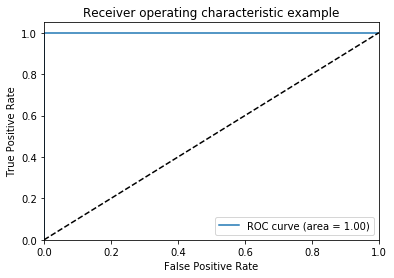

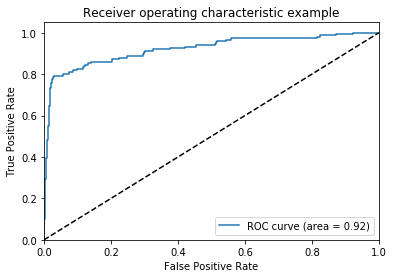

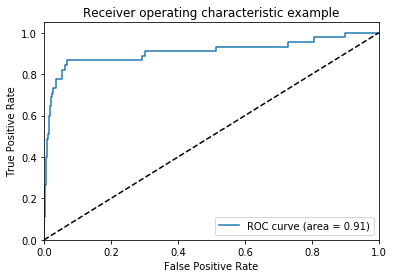

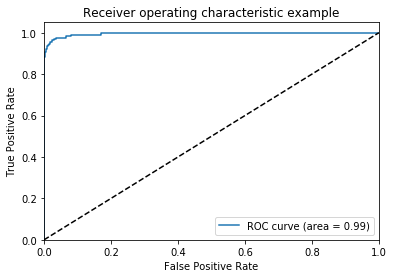

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

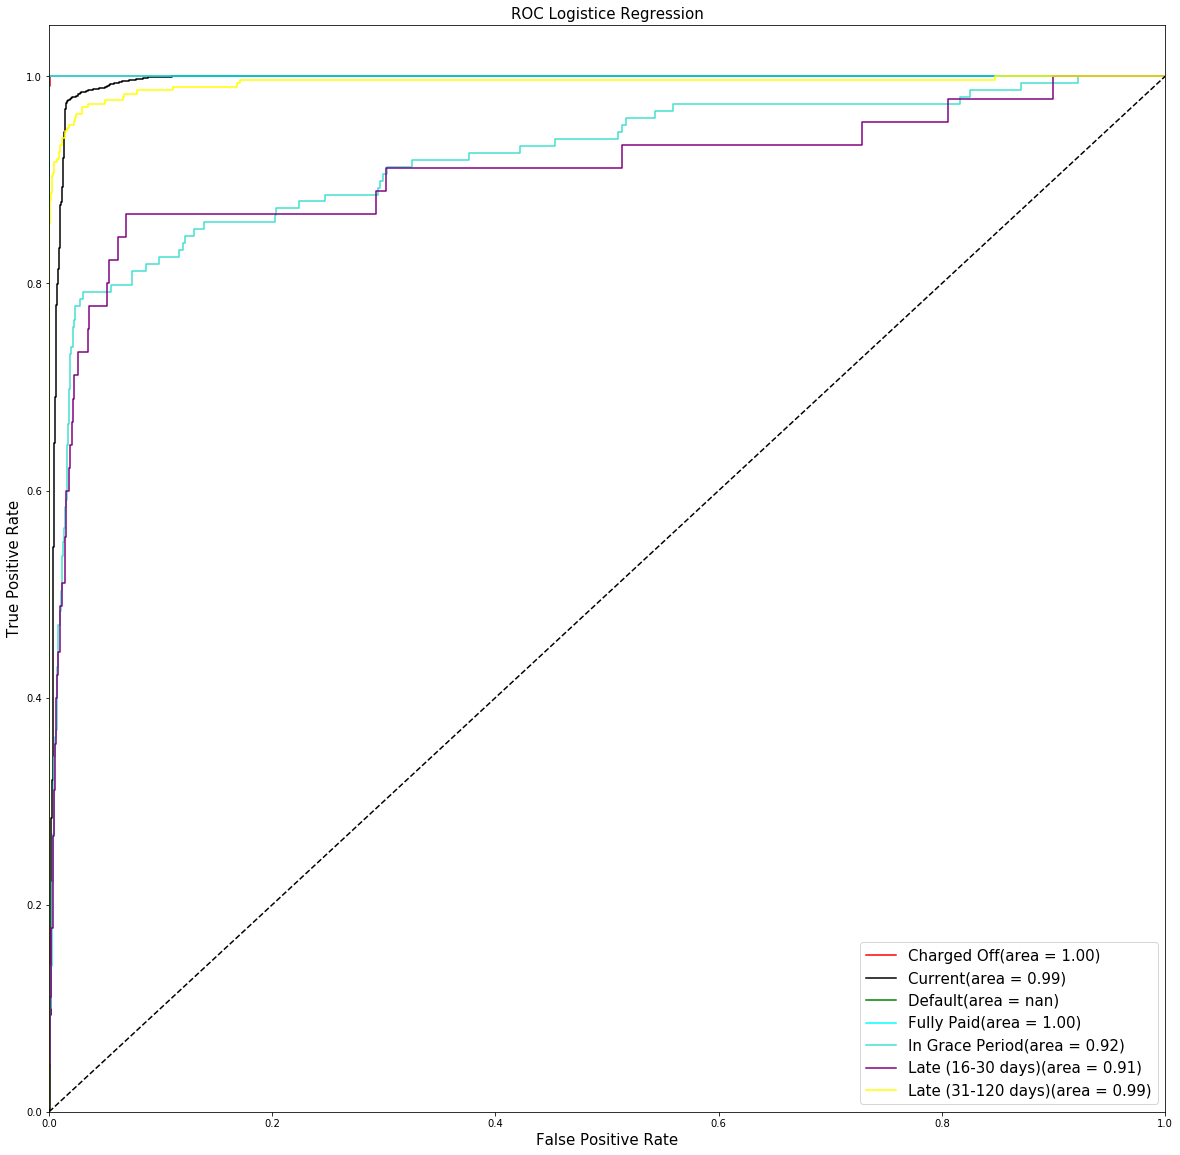

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize = (20,20))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{}(area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
plt.title('ROC Logistice Regression',fontsize = 15)
plt.legend(loc="lower right",fontsize = 15)

plt.show()
fig.savefig('Logistic Regression ROC.png')

In [190]:
roc_auc

{0: 0.9999841123104469,
 1: 0.9941536299160116,
 2: nan,
 3: 0.9999977205423352,
 4: 0.9208685601143758,
 5: 0.9081295095204606,
 6: 0.9936784245112392}